<a href="https://colab.research.google.com/github/g9ukxv/PyTorch-Tutorial/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://archive.ics.uci.edu/dataset/53/iris

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [17]:
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

<ipython-input-17-973526484>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('versicolor', 1.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [18]:
# Train Test Split! Set X, y
X = my_df.drop('species', axis=1)
y = my_df['species']

In [19]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [22]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [23]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train.astype(int))
y_test = torch.LongTensor(y_test.astype(int))

In [24]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate
# (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [29]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  i += 1
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

    # Do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 10 and loss: 0.36279216408729553
Epoch: 20 and loss: 0.3191407322883606
Epoch: 30 and loss: 0.1748015433549881
Epoch: 40 and loss: 0.4082704484462738
Epoch: 50 and loss: 0.2208314687013626
Epoch: 60 and loss: 0.26794102787971497
Epoch: 70 and loss: 0.4210410714149475
Epoch: 80 and loss: 0.16123466193675995
Epoch: 90 and loss: 0.4080997407436371
Epoch: 100 and loss: 0.1998434215784073


Text(0.5, 0, 'Epoch')

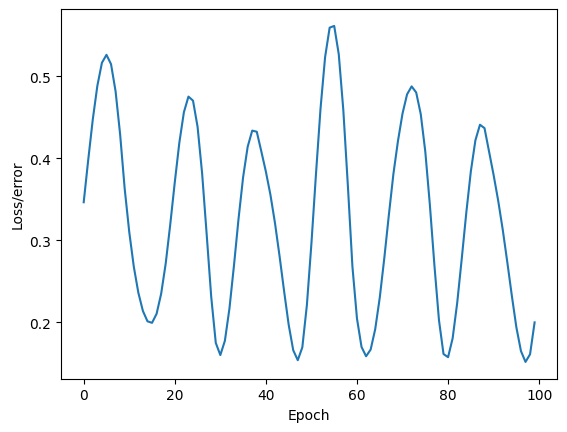

In [30]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')


In [31]:
# Evaluete Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [32]:
loss

tensor(0.3344)

In [40]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)}  \t {y_test[i]}  \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

  print(f'We got {correct} correct!')

1.)  tensor([-4.8920,  2.4374,  1.8645])  	 2  	 1
2.)  tensor([-7.4563,  2.7362,  3.6208])  	 2  	 2
3.)  tensor([-7.9328,  2.9701,  3.7648])  	 2  	 2
4.)  tensor([-2.2877,  2.0663,  0.0070])  	 1  	 1
5.)  tensor([-6.4784,  2.7347,  2.8505])  	 2  	 2
6.)  tensor([-1.6444,  1.8651, -0.2975])  	 1  	 1
7.)  tensor([-4.7233,  2.5183,  1.6552])  	 2  	 1
8.)  tensor([-2.3083,  2.0726,  0.0169])  	 1  	 1
9.)  tensor([-5.5945,  2.6292,  2.2543])  	 2  	 1
10.)  tensor([-7.9970,  2.8519,  3.9563])  	 2  	 2
11.)  tensor([-4.3714,  2.4790,  1.4450])  	 2  	 1
12.)  tensor([ 5.1922, -2.4648, -4.1740])  	 0  	 0
13.)  tensor([ 4.6389, -2.0434, -3.8194])  	 0  	 0
14.)  tensor([-0.8484,  1.6056, -0.6575])  	 1  	 1
15.)  tensor([ 4.5361, -1.9580, -3.7384])  	 0  	 0
16.)  tensor([-3.7079,  2.4305,  0.9850])  	 2  	 1
17.)  tensor([ 4.7227, -2.1073, -3.8731])  	 0  	 0
18.)  tensor([-4.6521,  2.4504,  1.7006])  	 1  	 1
19.)  tensor([ 4.9825, -2.3051, -4.0396])  	 0  	 0
20.)  tensor([ 4.0407